In [1]:
#######################################################################
# Copyright (C) 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)    #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

In [10]:
from IPython.display import Image

In [1]:
from utils import *
import numpy as np

# Value function 

그 state(상태)에서 앞으로 기대되는 모든 리워드들의 합(dicount factor 먹여진 리턴) <br>
= 그 상태에서 어떤 액션을 취할 확률(=__정책__)에 의한 다음 state'에서의 리턴의 합? 으로 나타낼 수.. <br>
또 하나의 action value function(q)는 다시 각 state별 value function으로 나타낼 수..!

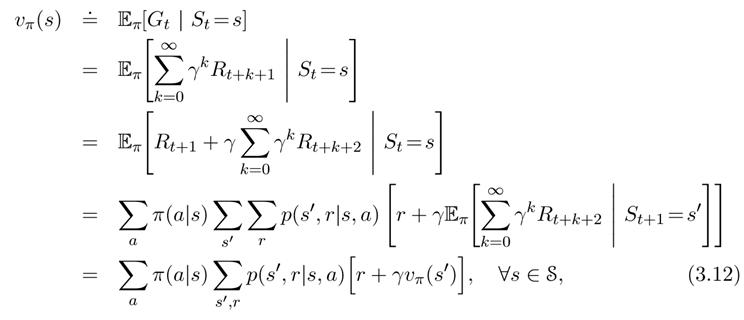

In [11]:
Image('./image/gridworld_0.jpg')

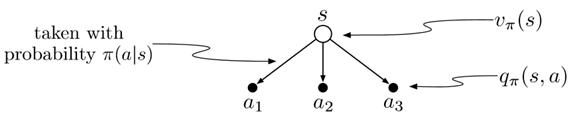

In [15]:
Image('./image/gridworld_4.jpg')

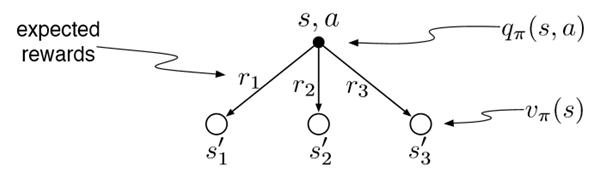

In [16]:
Image('./image/gridworld_5.jpg')

In [19]:
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# left, up, right, down
actions = ['L', 'U', 'R', 'D']

In [20]:
world

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

### action의 확률은 모두 동일?! 

추후 optimal policy가 정해지면 이 확률이 달라지려나.? 흠

In [5]:
actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

In [8]:
actionProb[0][1]

{'D': 0.25, 'L': 0.25, 'R': 0.25, 'U': 0.25}

# Reward 

막 다른 길로 가려하면 -1 먹이고,<br>
A로 가면 10점 주고 A'으로 <br>
B로 가면 5점 주고 B'으로

In [21]:
forAB = world
forAB[0][1] = 10
forAB[0][3] = 5
forAB

array([[  0.,  10.,   0.,   5.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

In [17]:
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        ## 막힌 곳으로 향하려 하면 -1의 리워드
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0

        if [i, j] == A_POS: # 포지션 A에 도달하면 10점을 얻고 A'으로 이동
            next['L'] = next['R'] = next['D'] = next['U'] = A_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        if [i, j] == B_POS: # 포지션 B에 도달하면 5점을 얻고 B'으로 이동
            next['L'] = next['R'] = next['D'] = next['U'] = B_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 5.0

        nextState[i].append(next)
        actionReward[i].append(reward)


# Random Policy 

즉, 액션을 어떤식으로 취하던지 신경쓰지 않겠다..?!

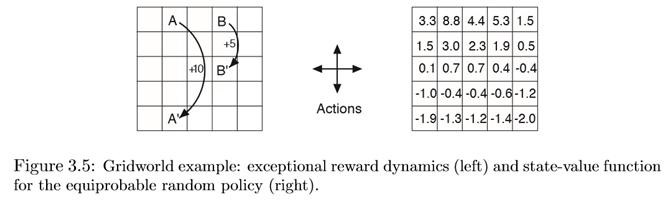

In [12]:
Image('./image/gridworld_1.jpg')

# Optimal Policy 

각 state 별 reward 기대값을 최대화 시킬 수 있는 액션으로

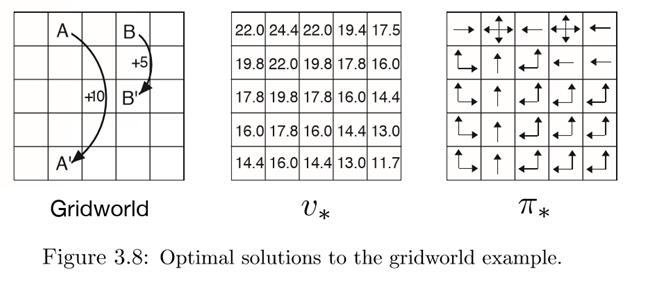

In [22]:
Image('./image/gridworld_2.jpg')

In [25]:
actions

['L', 'U', 'R', 'D']

In [26]:
actionProb[0][0]['L']

0.25

In [30]:
nextState[0][1]['L'][0]

4

In [34]:
# for figure 3.5
while True:
    # keep iteration until convergence
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            for action in actions:
                newPosition = nextState[i][j][action]
                # bellman equation # 어디로 가야할지 모르니 1/4 확률로 쪼개서 가져가자
                newWorld[i, j] += actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print 'Random Policy'
        print newWorld
        break
    world = newWorld

# for figure 3.8
world = np.zeros((WORLD_SIZE, WORLD_SIZE))
while True:
    # keep iteration until convergence
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            values = []
            for action in actions:
                newPosition = nextState[i][j][action]
                # value iteration # 4군데 다 가보고 거기서 제일 value 크게 주는 쪽으로 가자!(actionProb 안곱함)
                values.append(actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
            newWorld[i][j] = np.max(values)
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print 'Optimal Policy'
        print newWorld
        break
    world = newWorld

Random Policy
[[ 3.3090308   8.78932632  4.42765364  5.32240206  1.49221322]
 [ 1.52162253  2.99235232  2.25017441  1.90760617  0.54743717]
 [ 0.05085695  0.73820505  0.67314772  0.35822068 -0.40310668]
 [-0.97355784 -0.43546097 -0.3548478  -0.58557063 -1.18304062]
 [-1.85766609 -1.3451968  -1.2292328  -1.42288369 -1.97514459]]
Optimal Policy
[[ 21.97744338  24.41938153  21.97744338  19.41938153  17.47744338]
 [ 19.77969904  21.97744338  19.77969904  17.80172914  16.02153504]
 [ 17.80172914  19.77969904  17.80172914  16.02153504  14.41938153]
 [ 16.02153504  17.80172914  16.02153504  14.41938153  12.97744338]
 [ 14.41938153  16.02153504  14.41938153  12.97744338  11.67969904]]


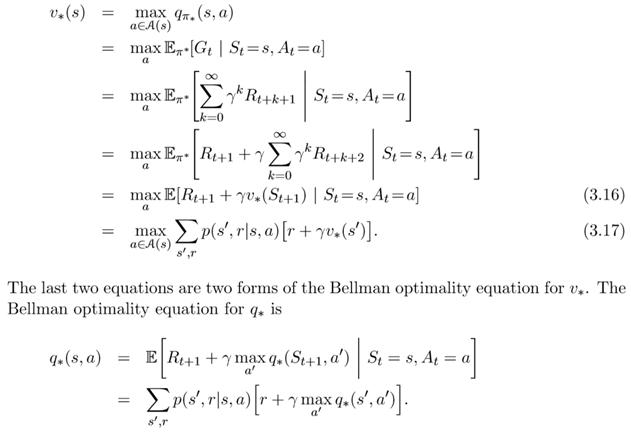

In [33]:
Image('./image/gridworld_3.jpg')